### Reading the json file

In [1]:
import json
tweets = []
for line in open('tweets.json', 'r'):
    tweets.append(json.loads(line))

### Checking the data

In [13]:
tweets[0]

{'in_reply_to_status_id_str': None,
 'text': 'If mitt romney say he gunna legalize weed then obama is fucked',
 'geo': None,
 'in_reply_to_screen_name': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'id_str': '246058205367644160',
 'retweeted': False,
 'created_at': 'Thu Sep 13 01:30:22 +0000 2012',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'entities': {'urls': [], 'user_mentions': [], 'hashtags': []},
 'in_reply_to_status_id': None,
 'place': None,
 'contributors': None,
 'coordinates': None,
 'favorited': False,
 'user': {'follow_request_sent': None,
  'statuses_count': 23815,
  'profile_background_image_url_https': 'https://si0.twimg.com/profile_background_images/643937019/07gmvz818szy9m7tupnt.jpeg',
  'default_profile_image': False,
  'friends_count': 721,
  'profile_sidebar_border_color': '000000',
  'id_str': '237158178',
  'is_translator': False,
  'verified': False,
  'favourites_count': 39,
  'geo

### Creating Dataframe by extracting the features that we need

In [3]:
import pandas as pd
tweets_df = pd.DataFrame(columns=['id','tweet'],index=None)
for tweet in tweets[0:1000]:
    data = pd.DataFrame({"id":[tweet['id_str']],"tweet":[tweet['text']]})
    tweets_df = tweets_df.append(data, ignore_index = True)

In [16]:
cnt = 0
for i in range (0,1000000):
    if len(tweets[i]['entities']['user_mentions']) > 0:
#         print(tweets[i]['text'])
#         print(tweets[i]['entities']['user_mentions'])
        cnt += 1
        
print(cnt)

655567


In [59]:
# obama_cnt = 0
# romney_cnt = 0
# obama_romney_cnt = 0
# for i in range(0,1000000):
#     obama = False;
#     romney = False;
#     for word in tweets[i]['text'].split():
# #         print(word)
#         if word.lower() in ["obama","barack","barackobama","obamabarack"]:
#             obama = True
#         if word.lower() in["mitt","romney","mittromney","romneymitt"]:
#             romney = True
#     if obama == True and romney == False:
#         obama_cnt += 1
#     elif obama == False and romney == True:
#         romney_cnt += 1
#     elif obama == True and romney == True:
#         obama_romney_cnt += 1
# print(obama_cnt)
# print(romney_cnt)
# print(obama_romney_cnt)

In [19]:
tweets[0]['text']

'If mitt romney say he gunna legalize weed then obama is fucked'

### Analysing the data and finding the number of Obama and Romney tweets

In [34]:
obama_cnt = 0
romney_cnt = 0
obama_romney_cnt = 0

import pandas as pd
tweets_df = pd.DataFrame(columns=['id','tweet'],index=None)

for i in range(0,len(tweets)):
    if(i % 10000 == 0):
        print("i:",i)
    obama = False;
    romney = False;
    for word in tweets[i]['text'].split():
#         print(word)
        if word.lower() in ["obama","barack","barackobama","obamabarack"]:
            obama = True
        if word.lower() in["mitt","romney","mittromney","romneymitt"]:
            romney = True
    if obama == True and romney == False:
        data = pd.DataFrame({"id":[tweets[i]['id_str']],"tweet":[tweets[i]['text']]})
        tweets_df = tweets_df.append(data, ignore_index = True)
        obama_cnt += 1
    elif obama == False and romney == True:
        data = pd.DataFrame({"id":[tweets[i]['id_str']],"tweet":[tweets[i]['text']]})
        tweets_df = tweets_df.append(data, ignore_index = True)
        romney_cnt += 1
#     elif obama == True and romney == True:
#         obama_romney_cnt += 1
print(obama_cnt)
print(romney_cnt)
print(obama_romney_cnt)

i: 0
i: 10000
i: 20000
i: 30000
i: 40000
i: 50000
i: 60000
i: 70000
i: 80000
i: 90000
i: 100000
i: 110000
i: 120000
i: 130000
i: 140000
i: 150000
i: 160000
i: 170000
i: 180000
i: 190000
i: 200000
i: 210000
i: 220000
i: 230000
i: 240000
i: 250000
i: 260000
i: 270000
i: 280000
i: 290000
i: 300000
i: 310000
i: 320000
i: 330000
i: 340000
i: 350000
i: 360000
i: 370000
i: 380000
i: 390000
i: 400000
i: 410000
i: 420000
i: 430000
i: 440000
i: 450000
i: 460000
i: 470000
i: 480000
i: 490000
i: 500000
i: 510000
i: 520000
i: 530000
i: 540000
i: 550000
i: 560000
i: 570000
i: 580000
i: 590000
i: 600000
i: 610000
i: 620000
i: 630000
i: 640000
i: 650000
i: 660000
i: 670000
i: 680000
i: 690000
i: 700000
i: 710000
i: 720000
i: 730000
i: 740000
i: 750000
i: 760000
i: 770000
i: 780000
i: 790000
i: 800000
i: 810000
i: 820000
i: 830000
i: 840000
i: 850000
i: 860000
i: 870000
i: 880000
i: 890000
i: 900000
i: 910000
i: 920000
i: 930000
i: 940000
i: 950000
i: 960000
i: 970000
i: 980000
i: 990000
324805
30092
0

In [35]:
print(len(tweets_df))

354897


### Removing the unnecessary data from the tweet like RT symbols, hyperlinks usermention symbols, hashtag symbols, etc

In [44]:
import re
processed_tweet = []
for i in range (0,len(tweets_df)):
    if(i % 10000 == 0):
        print("i:",i)
    x = tweets_df.iloc[i]['tweet']
#     tweets_df.iloc[i]['tweet'] = ' '.join(re.sub("(RT)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
    temp = ' '.join(re.sub("(RT)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
    processed_tweet.append(temp)
tweets_df['processed_tweet'] = processed_tweet


i: 0
i: 10000
i: 20000
i: 30000
i: 40000
i: 50000
i: 60000
i: 70000
i: 80000
i: 90000
i: 100000
i: 110000
i: 120000
i: 130000
i: 140000
i: 150000
i: 160000
i: 170000
i: 180000
i: 190000
i: 200000
i: 210000
i: 220000
i: 230000
i: 240000
i: 250000
i: 260000
i: 270000
i: 280000
i: 290000
i: 300000
i: 310000
i: 320000
i: 330000
i: 340000
i: 350000


In [45]:
tweets_df.head()

,id,tweet,processed_tweet
0,246058206651117568,Can we please stop pretending that Obama is a ...,Can we please stop pretending that Obama is a ...
1,246058207460614144,RT @MotherJones: The official GOP response to ...,The official GOP response to Americans being k...
2,246058208463044608,RT @PolarCoug: Obama would never make a good r...,Obama would never make a good running back He ...
3,246058208584671234,RT @Zack_gale: You cant bag on Obama if you on...,gale You cant bag on Obama if you only pay att...
4,246058212116267008,@SethLavin national pressure on both sides to ...,national pressure on both sides to end it will...


### Extract the Adjectives, verbs and adverbs from the tweet

In [47]:
from nltk.tokenize import word_tokenize
import nltk
tweets_imp_words_df = pd.DataFrame(columns=['id','Adj_Adv_Verb','pos'],index=None)
for i in range (0,len(tweets_df)):
    if(i % 10000 == 0):
        print("i:",i)
    text = word_tokenize(tweets_df.iloc[i]['processed_tweet'])
    pos_tagged_words = nltk.pos_tag(text)
    tempStr = ''
    pos = []
    for i in range(0,len(pos_tagged_words)):
        if pos_tagged_words[i][1] in ['JJ','JJR','JJS','RB','RBR','RBS','VB','VBD','VBG','VBN','VBP','VBZ']:
            tempStr += pos_tagged_words[i][0]+" "
            pos.append(pos_tagged_words[i][1])
    tempData = pd.DataFrame({"id":[tweets_df.iloc[i]['id']],"Adj_Adv_Verb":[tempStr],"pos":[pos]})
    tweets_imp_words_df = tweets_imp_words_df.append(tempData, ignore_index = True)

i: 0
i: 10000
i: 20000
i: 30000
i: 40000
i: 50000
i: 60000
i: 70000
i: 80000
i: 90000
i: 100000
i: 110000
i: 120000
i: 130000
i: 140000
i: 150000
i: 160000
i: 170000
i: 180000
i: 190000
i: 200000
i: 210000
i: 220000
i: 230000
i: 240000
i: 250000
i: 260000
i: 270000
i: 280000
i: 290000
i: 300000
i: 310000
i: 320000
i: 330000
i: 340000
i: 350000


In [50]:
tweets_imp_words_df.head()
print(len(tweets_imp_words_df))

354897


### Scoring the extracted adjectives, verbs and adverbs

In [51]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

sid = SentimentIntensityAnalyzer()
individual_score = []
for i in range (0,len(tweets_imp_words_df)):
    if(i % 10000 == 0):
        print("i:",i)
    temp_individual_score = []
    for word in tweets_imp_words_df.iloc[i]['Adj_Adv_Verb'].split():
        temp_individual_score.append(sid.polarity_scores(word)['compound'])
    individual_score.append(temp_individual_score)
tweets_imp_words_df['individual_scores'] = individual_score

i: 0
i: 10000
i: 20000
i: 30000
i: 40000
i: 50000
i: 60000
i: 70000
i: 80000
i: 90000
i: 100000
i: 110000
i: 120000
i: 130000
i: 140000
i: 150000
i: 160000
i: 170000
i: 180000
i: 190000
i: 200000
i: 210000
i: 220000
i: 230000
i: 240000
i: 250000
i: 260000
i: 270000
i: 280000
i: 290000
i: 300000
i: 310000
i: 320000
i: 330000
i: 340000
i: 350000


### Rescoring the adjectives, verbs and adverbs based on the method

In [52]:
for i in range (0,len(tweets_imp_words_df)):
    if(i % 10000 == 0):
        print("i:",i)
    pos = tweets_imp_words_df.iloc[i]['pos']
    for j in range (1,len(tweets_imp_words_df.iloc[i]['individual_scores'])):
        if(pos[j] in ['JJ','JJR','JJS'] and pos[j-1] not in ['JJ','JJR','JJS']):
            if(tweets_imp_words_df.iloc[i]['individual_scores'][j-1] > 0):
                tweets_imp_words_df.iloc[i]['individual_scores'][j-1] *= tweets_imp_words_df.iloc[i]['individual_scores'][j]
            elif(tweets_imp_words_df.iloc[i]['individual_scores'][j-1] < 0):
                tweets_imp_words_df.iloc[i]['individual_scores'][j] = 5 - tweets_imp_words_df.iloc[i]['individual_scores'][j]

i: 0
i: 10000
i: 20000
i: 30000
i: 40000
i: 50000
i: 60000
i: 70000
i: 80000
i: 90000
i: 100000
i: 110000
i: 120000
i: 130000
i: 140000
i: 150000
i: 160000
i: 170000
i: 180000
i: 190000
i: 200000
i: 210000
i: 220000
i: 230000
i: 240000
i: 250000
i: 260000
i: 270000
i: 280000
i: 290000
i: 300000
i: 310000
i: 320000
i: 330000
i: 340000
i: 350000


### Finding the final score of the tweet

In [53]:
score = []
for i in range (0,len(tweets_imp_words_df)):
    temp_score = 0;
    no_of_adj = 0;
    pos = tweets_imp_words_df.iloc[i]['pos']
    for j in range (0,len(tweets_imp_words_df.iloc[i]['individual_scores'])):
        temp_score += tweets_imp_words_df.iloc[i]['individual_scores'][j]
        if(pos[j] in ['JJ','JJR','JJS']):
            no_of_adj += 1;
    if no_of_adj > 0:
        temp_score = temp_score/no_of_adj;
    score.append(temp_score)
tweets_imp_words_df['score'] = score

In [60]:
# pos = 0;
# neg = 0;
# neu = 0;
# for i in range (0,len(tweets_imp_words_df)):
#     if(i % 10000 == 0):
#         print("i:",i)
#     if tweets_imp_words_df.iloc[i]['score'] > 0:
#         pos += 1
#     elif  tweets_imp_words_df.iloc[i]['score'] < 0:
#         neg += 1
#     else:
#         neu += 1

In [61]:
# print(pos)
# print(neg)
# print(neu)

In [57]:
is_obama = []
is_romney = []
for i in range(0,len(tweets_imp_words_df)):
    if(i % 20000 == 0):
        print("i:",i)
    obama = False;
    romney = False;
    for word in tweets_df.iloc[i]['tweet'].split():
#         print(word)
        if word.lower() in ["obama","barack","obamabarack","barackobama"]:
            obama = True
        if word.lower() in["mitt","romney","mittromney","romneymitt"]:
            romney = True
    is_obama.append(obama)
    is_romney.append(romney)
tweets_imp_words_df['is_obama'] = is_obama
tweets_imp_words_df['is_romney'] = is_romney

i: 0
i: 20000
i: 40000
i: 60000
i: 80000
i: 100000
i: 120000
i: 140000
i: 160000
i: 180000
i: 200000
i: 220000
i: 240000
i: 260000
i: 280000
i: 300000
i: 320000
i: 340000


### Finding the number of positive and negative tweets for Obama and Romney

In [58]:
obama_pos = 0
obama_neg = 0
obama_neu = 0
romney_pos = 0
romney_neg = 0
romney_neu = 0
for i in range (0, len(tweets_imp_words_df)):
    if(i % 20000 == 0):
        print("i:",i)
    if tweets_imp_words_df.iloc[i]['is_obama'] == True and tweets_imp_words_df.iloc[i]['score'] > 0:
        obama_pos += 1
    elif tweets_imp_words_df.iloc[i]['is_obama'] == True and tweets_imp_words_df.iloc[i]['score'] < 0:
        obama_neg += 1
    elif tweets_imp_words_df.iloc[i]['is_obama'] == True and tweets_imp_words_df.iloc[i]['score'] == 0:
        obama_neu += 1
    elif tweets_imp_words_df.iloc[i]['is_romney'] == True and tweets_imp_words_df.iloc[i]['score'] > 0:
        romney_pos += 1
    elif tweets_imp_words_df.iloc[i]['is_romney'] == True and tweets_imp_words_df.iloc[i]['score'] < 0:
        romney_neg += 1
    elif tweets_imp_words_df.iloc[i]['is_romney'] == True and tweets_imp_words_df.iloc[i]['score'] == 0:
        romney_neu += 1
        
print("obama_pos",obama_pos)
print("obama_neg",obama_neg)
print("obama_neu",obama_neu)
print("romney_pos",romney_pos)
print("romney_neg",romney_neg)
print("romney_neu",romney_neu)

i: 0
i: 20000
i: 40000
i: 60000
i: 80000
i: 100000
i: 120000
i: 140000
i: 160000
i: 180000
i: 200000
i: 220000
i: 240000
i: 260000
i: 280000
i: 300000
i: 320000
i: 340000
obama_pos 77341
obama_neg 67574
obama_neu 179882
romney_pos 6603
romney_neg 7545
romney_neu 15854


### Creating the results grapph for comparing all the methods that were executed

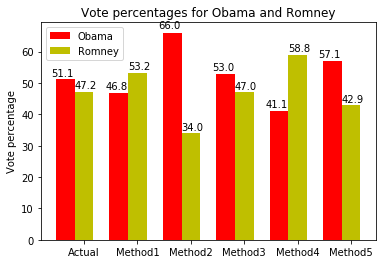

In [55]:
import numpy as np
import matplotlib.pyplot as plt

N = 6
ObamaScore = (51.1, 46.8, 66, 53, 41.1, 57.1)

fig, ax = plt.subplots()

ind = np.arange(N)   
width = 0.35
p1 = ax.bar(ind - width/2, ObamaScore, width, color='r', bottom=0)

RomneyScore = (47.2, 53.2, 34, 47, 58.8, 42.9)

p2 = ax.bar(ind + width/2, RomneyScore, width,color='y', bottom=0)

ax.set_title('Vote percentages for Obama and Romney')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Actual', 'Method1', 'Method2', 'Method3', 'Method4', 'Method5'))

ax.legend((p1[0], p2[0]), ('Obama', 'Romney'))
ax.set_ylabel("Vote percentage")

def autolabel(rects, xpos='center'):
    
# for labelling the bar graph with its values

    xpos = xpos.lower()  
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.00, 'left': 0.95}

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(p1, "left")
autolabel(p2, "right")

plt.show()

### Graph for the analysis of percentage of Obama and Romney tweets

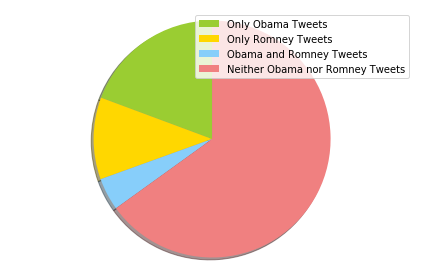

In [74]:
import matplotlib.pyplot as plt

324805
30092
51443

labels = ['Only Obama Tweets', 'Only Romney Tweets', 'Obama and Romney Tweets', 'Neither Obama nor Romney Tweets']
sizes = [224805/1000000, 130092/1000000, 51443/1000000, (1000000-324805+30092+51443)/1000000]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()